# Import the Data

In [ ]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import plotly.graph_objects as go

In [ ]:
url = f"https://drive.google.com/file/d/1Ycy2GkYBe35UXmwY4Nw4fQ2WIFeLdJj-/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

spotifysongs = pd.read_csv(path, index_col=0)


In [ ]:
spotifysongs

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [ ]:
spotifysongs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                                 

### Set name,artist as index

In [ ]:
spotifysongs = spotifysongs.set_index(['name                                                                                                                                                                             ',
                                       'artist                                          '])

### Adjust column names by strip() method

In [ ]:
spotifysongs.columns

Index(['danceability ', 'energy   ', 'key ', 'loudness ', 'mode ',
       'speechiness ', 'acousticness ', 'instrumentalness ', 'liveness ',
       'valence ', 'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [ ]:
spotifysongs.columns.str.strip()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

In [ ]:
spotifysongs.rename(columns={'danceability ':'danceability',
                         'energy   ':'energy',
                         'key ':'key',
                         'loudness ':'loudness',
                         'mode ': 'mode',
                         'speechiness ': 'speechiness',
                         'acousticness ':'acousticness',
                         'instrumentalness ':'instrumentalness',
                         'liveness ':'liveness',
                         'valence ':'valence',
                         'tempo   ':'tempo',
                        'type ':'type',
                         'duration_ms ':'duration_ms',
                         'time_signature ':'time_signature',
                         'id                     ':'id',
                          'html':'html'
                         },inplace=True)


In [ ]:
to_drop = ['type','id','html']
spotifysongs = spotifysongs.drop(columns=to_drop)

In [ ]:
spotifysongs

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


### Explore & Clean the Data

In [ ]:
spotifysongs.duplicated().value_counts()

False    5160
True       75
Name: count, dtype: int64

In [ ]:
spotifysongs.duplicated()

name                                                                                                                                                                               artist                                          
Se Eu Quiser Falar Com Deus                                                                                                                                                        Gilberto Gil                                        False
Saudade De Bahia                                                                                                                                                                   Antônio Carlos Jobim                                False
Canta Canta, Minha Gente                                                                                                                                                           Martinho Da Vila                                    False
Mulher Eu Sei                                                

In [ ]:
spotifysongs.drop_duplicates(inplace=True)

In [ ]:
spotifysongs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5160 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5160 non-null   float64
 1   energy            5160 non-null   float64
 2   key               5160 non-null   int64  
 3   loudness          5160 non-null   float64
 4   mode              5160 non-null   int64  
 5   speechiness       5160 non-null   float64
 6   acousticness      5160 non-null   float64
 7   instru

In [ ]:
spotifysongs.isnull().count()

danceability        5160
energy              5160
key                 5160
loudness            5160
mode                5160
speechiness         5160
acousticness        5160
instrumentalness    5160
liveness            5160
valence             5160
tempo               5160
duration_ms         5160
time_signature      5160
dtype: int64

In [ ]:
spotifysongs

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


### MinMax Scalar

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") # If you want to explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/

# Scale the foods_df DataFrame
spotifysongs_minmax = scaler.fit_transform(spotifysongs)
spotifysongs_minmax

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      init="random",
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(spotifysongs_minmax)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

In [ ]:
inertia_list

[4565.3139149321605,
 3371.194006177806,
 2616.6233107553253,
 2202.911841591992,
 1996.774255955907,
 1799.5129272003414,
 1627.156553991143,
 1488.6523094099462,
 1397.5726707066256,
 1308.408073508047,
 1233.1066164246577,
 1187.2678352272565,
 1148.392989913888,
 1102.8344372202403,
 1071.065738510351,
 1038.9509683784477,
 998.8155837094694,
 983.2808672081937,
 962.8199891650517,
 944.5347432455419,
 928.1122826846076,
 913.5871522858245,
 903.5595834032,
 881.1837910300737,
 871.1310729062817,
 859.2500083328837,
 854.2207405750215,
 843.6625445290076,
 834.102449706375,
 826.7885703939651,
 815.0254167353879,
 801.0879620351677,
 792.552185283633,
 786.4016403879828,
 777.1801433993033,
 766.3899226941367,
 758.1955115711328,
 753.2494614325796,
 748.660012044636,
 735.8243967955516,
 728.5825487264185,
 726.2450151420588,
 717.0720117611866,
 720.1524702850363,
 714.6348137892103,
 697.7673639402124,
 694.7504034228823,
 694.0146854677953,
 689.6006960860136,
 684.649552409557

### Inertia Score

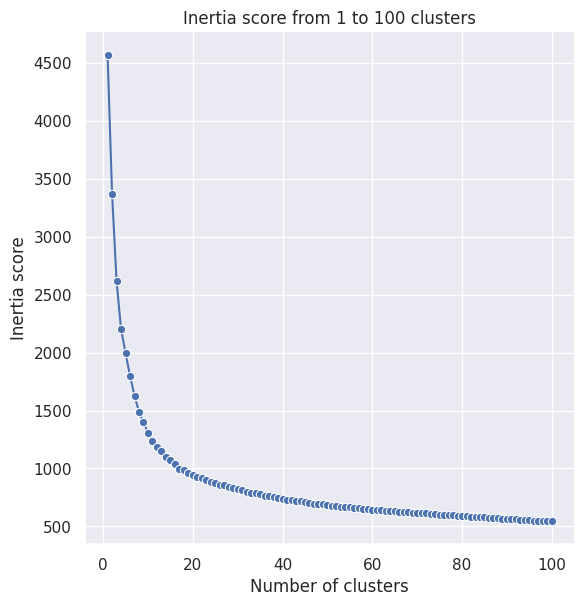

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 6,
            aspect = 1)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### KMeans Clustering

In [ ]:
spotifysongs_minmax_kmeans = KMeans(n_clusters = 40,
                      random_state = seed)

# 3. fit the model to the data
spotifysongs_minmax_kmeans.fit(spotifysongs_minmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=40, random_state=123)

In [ ]:
# obtain the cluster output
cluster = spotifysongs_minmax_kmeans.labels_

# attach the cluster output to our original DataFrame
spotifysongs_minmax["group"] = cluster

spotifysongs_minmax.sort_values(by="group")

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
name,artist,,,,,,,,,,,,,,
What Happens in Vegas - Radio Edit,Chuckie feat. Gregor Salto,0.746639,0.924,0.545455,0.939030,1.0,0.042048,0.000343,0.637563,0.082371,0.689340,0.607463,0.036237,0.8,0
Casino Royale,DJ Zinc,0.569804,0.963,0.727273,0.888021,1.0,0.050763,0.006657,0.937056,0.090274,0.852792,0.804005,0.104728,0.8,0
Coming Home (Dirty South Remix) [feat. Skylar Grey],Diddy - Dirty Money,0.750776,0.653,0.363636,0.815999,1.0,0.051307,0.001386,0.400000,0.142857,0.472081,0.598089,0.080056,0.8,0
Walk This Land,E-Z Rollers,0.691830,0.851,0.090909,0.895390,1.0,0.051525,0.010643,0.875127,0.312057,0.959391,0.763536,0.052226,0.8,0
The Black Dahlia,Lamb of God,0.435367,0.945,0.181818,0.911822,1.0,0.113290,0.000060,0.658883,0.044883,0.621320,0.422422,0.044257,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
This Girl - Kungs Vs. Cookin' On 3 Burners,Kungs,0.816960,0.705,0.000000,0.901764,0.0,0.041721,0.081024,0.000049,0.254306,0.508629,0.569975,0.043035,0.8,39
Si No Le Contesto,Plan B,0.874871,0.747,0.090909,0.895406,0.0,0.058061,0.095080,0.000000,0.161094,0.524873,0.443960,0.049510,0.8,39
Sowieso,Mark Forster,0.790072,0.672,0.090909,0.886636,0.0,0.246187,0.039859,0.000006,0.078723,0.738071,0.598294,0.040708,0.8,39


In [ ]:
# Calculate the mean of all the features
spotifysongs_minmax.groupby(by="group").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
group,,,,,,,,,,,,,
0,0.612454,0.805405,0.355037,0.864352,1.0,0.067735,0.082599,0.723103,0.217379,0.632515,0.637319,0.053749,0.791892
1,0.786376,0.733932,0.468673,0.878887,0.0,0.126566,0.151714,0.004947,0.155193,0.798484,0.538376,0.051309,0.795946
2,0.441092,0.199839,0.792877,0.723294,1.0,0.048174,0.897870,0.048506,0.212338,0.284262,0.490840,0.054839,0.758763
3,0.789985,0.677802,0.098560,0.856022,1.0,0.108733,0.174015,0.009477,0.133075,0.783596,0.516531,0.050226,0.798020
4,0.526341,0.288314,0.292929,0.710601,0.0,0.059910,0.791193,0.847518,0.170711,0.400454,0.495482,0.066243,0.805556
5,0.311031,0.116220,0.692846,0.615272,1.0,0.049744,0.956126,0.890271,0.125120,0.134080,0.509734,0.076402,0.726627
6,0.717197,0.766500,0.633690,0.863271,0.0,0.074942,0.101700,0.740102,0.195688,0.729860,0.619069,0.066215,0.800000
7,0.634788,0.776819,0.503788,0.890475,0.0,0.091390,0.079704,0.030330,0.176436,0.484970,0.567519,0.050725,0.795833
8,0.268851,0.909715,0.708947,0.845987,1.0,0.114067,0.008827,0.815497,0.206850,0.224603,0.557154,0.059445,0.785771


In [ ]:
filtered_df = spotifysongs_minmax[spotifysongs_minmax['group'] == 2]
filtered_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
name,artist,,,,,,,,,,,,,,
Rosa Morena,Kurt Elling,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,2
The Girl From Ipanema,Stan Getz,0.662875,0.14000,0.727273,0.704411,1.0,0.042484,0.870482,0.001685,0.106383,0.393909,0.604318,0.075397,0.8,2
Rosa Morena - Live At Carnegie Hall/1964,Stan Getz,0.547053,0.13400,0.636364,0.540886,1.0,0.094662,0.909639,0.122843,0.703141,0.481218,0.624394,0.056005,0.8,2
Kaipuusamba,Maria Gasolina,0.560496,0.22400,0.545455,0.715236,1.0,0.064815,0.777108,0.090051,0.115502,0.540102,0.372447,0.048501,0.8,2
Once Again,Stan Getz,0.644261,0.33100,0.727273,0.744254,1.0,0.040523,0.849398,0.079289,0.079027,0.591878,0.422632,0.097738,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Faith That Conquers,Kelly Price,0.343330,0.40400,0.727273,0.880588,1.0,0.033660,0.929719,0.000000,0.216819,0.312690,0.617048,0.063500,0.8,2
For Your Glory - 1 Mic 1 Take,Tasha Cobbs Leonard,0.434333,0.38100,0.727273,0.874376,1.0,0.046950,0.874498,0.000000,0.120567,0.395939,0.583462,0.059678,0.6,2
"Symphony, Op. 21: I. Ruhig schreitend",Anton Webern,0.175801,0.00579,0.727273,0.504255,1.0,0.049346,0.972892,0.070761,0.597771,0.035533,0.452563,0.093252,0.2,2


In [ ]:
cluster_2 = spotifysongs_minmax[spotifysongs_minmax['group'] == 2]
cluster_2

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
name,artist,,,,,,,,,,,,,,
Rosa Morena,Kurt Elling,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,2
The Girl From Ipanema,Stan Getz,0.662875,0.14000,0.727273,0.704411,1.0,0.042484,0.870482,0.001685,0.106383,0.393909,0.604318,0.075397,0.8,2
Rosa Morena - Live At Carnegie Hall/1964,Stan Getz,0.547053,0.13400,0.636364,0.540886,1.0,0.094662,0.909639,0.122843,0.703141,0.481218,0.624394,0.056005,0.8,2
Kaipuusamba,Maria Gasolina,0.560496,0.22400,0.545455,0.715236,1.0,0.064815,0.777108,0.090051,0.115502,0.540102,0.372447,0.048501,0.8,2
Once Again,Stan Getz,0.644261,0.33100,0.727273,0.744254,1.0,0.040523,0.849398,0.079289,0.079027,0.591878,0.422632,0.097738,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Faith That Conquers,Kelly Price,0.343330,0.40400,0.727273,0.880588,1.0,0.033660,0.929719,0.000000,0.216819,0.312690,0.617048,0.063500,0.8,2
For Your Glory - 1 Mic 1 Take,Tasha Cobbs Leonard,0.434333,0.38100,0.727273,0.874376,1.0,0.046950,0.874498,0.000000,0.120567,0.395939,0.583462,0.059678,0.6,2
"Symphony, Op. 21: I. Ruhig schreitend",Anton Webern,0.175801,0.00579,0.727273,0.504255,1.0,0.049346,0.972892,0.070761,0.597771,0.035533,0.452563,0.093252,0.2,2


### After Reclustering of Cluster 2, we got Cluster 0 as a match to form a Playlist for Classical Songs


In [ ]:
cluster_2 = spotifysongs_minmax[spotifysongs_minmax['group'] == 2]
# Set the maximum number of clusters to try
max_k = 4

# Create an empty list to store the inertia scores
inertia_list_2 = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      init="random",
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(cluster_2)

    # Append the inertia score to the list
    inertia_list_2.append(myKMeans.inertia_)

cluster_2_kmeans = KMeans(n_clusters = 4,
                      random_state = seed)

# 3. fit the model to the data
cluster_2_kmeans.fit(cluster_2)
# obtain the cluster output
group_2 = cluster_2_kmeans.labels_

# attach the cluster output to our original DataFrame
cluster_2["cluster"] = group_2

cluster_2.sort_values(by="cluster")
filtered_df = cluster_2[cluster_2['cluster'] == 0]
filtered_df